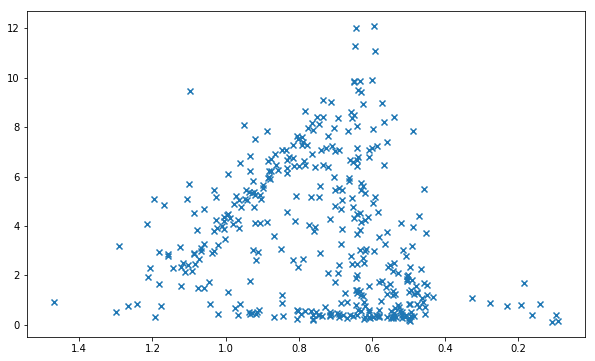

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.stats import linregress


def calculate_line(m,x,c):
    return np.dot(m,x) + c


data_frame = pd.read_csv("d:data\Pleiades_Hartman.csv", encoding = "utf-8", delimiter = "\t", comment = "#")
mass = data_frame.M.tolist()
period = data_frame.Per.tolist()

fig,ax = plt.subplots(1,figsize=(10,6))

ax.invert_xaxis()
ax.scatter(mass,period, marker="x")

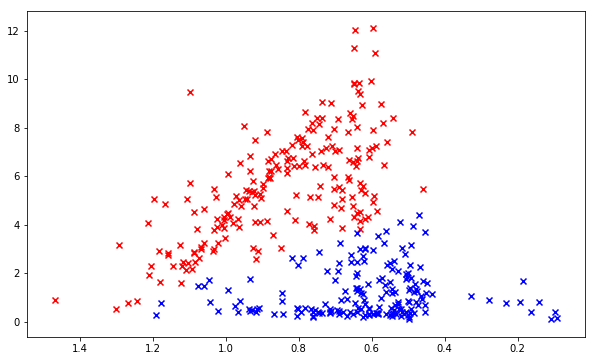

In [120]:
# x = np.linspace(1.4,0,len(period))
fake_y = calculate_line(-5,mass,7)
group = [1  if period[i] >= fake_y[i] else 0  for i in range(len(period))]

fig2, ax2 = plt.subplots(1, figsize = (10,6))
ax2.invert_xaxis()
for i in range(len(fake_y)):
    if group[i] == 1:
        ax2.scatter(mass[i], period[i], color = "red", marker = "x")
    else:
        ax2.scatter(mass[i], period[i], color = "blue", marker = "x")


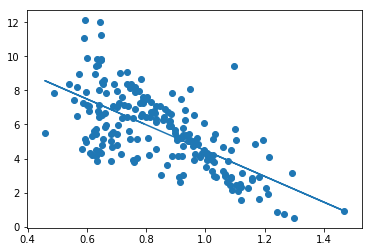

In [132]:

upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]

lower_period = [period[i]  for i in range(len(group)) if group[i] == 0]
lower_mass = [mass[i]  for i in range(len(group)) if group[i] == 0]

upper_slope, upper_intercept, _,_,_ = linregress((upper_mass,upper_period))

fake_domain = np.linspace (1.4,0,100)
fake_range = calculate_line(upper_slope,upper_mass,upper_intercept)

plt.scatter(upper_mass,upper_period)
plt.plot(upper_mass,fake_range)
# print(len(lower_period), len(upper_mass))